In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline

In [16]:
data = datasets.load_breast_cancer()
Xs=data.data
scaler = preprocessing.StandardScaler().fit(Xs)
scaler.transform(Xs)


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ..., 
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [21]:
Xtt=Xs[:int(569*0.8),:]
Xv=Xs[int(569*0.8):,:]

In [23]:
Ytt=data.target[:int(569*0.8)]
Yv=data.target[int(569*0.8):]

In [19]:

X_train, X_test, Y_train, Y_test = train_test_split(Xtt, Ytt)

In [7]:
def FT(predict, test):
    FalsoPositivo=0.
    Acierto=0.
    for i in range(len(predict)):
        if(predict[i]==test[i]):
            Acierto+=1
        elif(test[i]==0 and predict[i]==1):
            FalsoPositivo+=1
    return Acierto/len(predict),FalsoPositivo/len(predict)

In [9]:
def gauss(C,gamma):
    kernel_svc = svm.SVC(C=C, kernel='rbf', gamma=gamma)
    kernel_svc.fit(X_train,Y_train)
    Y_predict = kernel_svc.predict(X_test)
    ac,Fp=FT(Y_predict,Y_test)
    return ac,Fp

In [10]:
def poly(C,degree):
    kernel_svc = svm.SVC(C=C, kernel='poly', degree=degree)
    kernel_svc.fit(X_train,Y_train)
    Y_predict = kernel_svc.predict(X_test)
    ac,Fp=FT(Y_predict,Y_test)
    return ac,Fp

In [11]:
def lineal(C):
    linear_svc = svm.SVC(C=C, kernel='linear')
    linear_svc.fit(X_train,Y_train)
    Y_predict = linear_svc.predict(X_test)
    ac,Fp=FT(Y_predict,Y_test)
    return ac,Fp

In [22]:
C=np.linspace(4,10,20)
gamma=np.linspace(0.00001,0.01,60)
n=len(C)*len(gamma)
gaussx=[]
gaussy=[]
maxAC=0
minFP=1
Cc=0
G=0
for i in range(len(C)):
    for j in range(len(gamma)):
        ac, fp = gauss(C[i],gamma[j])
        if(ac>maxAC):
            maxAC=ac
            Cc=C[i]
            G=gamma[i]
        gaussx.append(ac)
        gaussy.append(fp)

4.0 1e-05


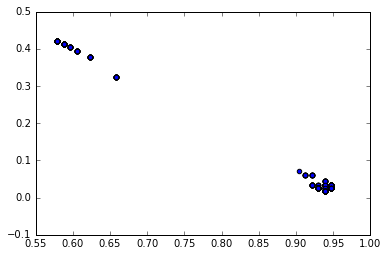

In [23]:
plt.scatter(gaussx,gaussy)
print Cc,G

In [23]:
C=np.linspace(0.01,1,10)

linealx=[]
linealy=[]
Cl=0
maxAC=0

for i in range(len(C)):
    ac, fp = lineal(C[i])
    if(ac>maxAC):
            maxAC=ac
            Cl=C[i]
    linealx.append(ac)
    linealy.append(fp)

0.01


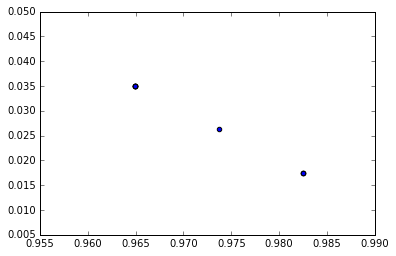

In [25]:
plt.scatter(linealx,linealy)
print Cl

In [12]:
C=np.linspace(0.5,1,2)
dg=np.linspace(1,2,2)
polyx=[]
polyy=[]
Cp=0
dgp=0
maxAC=0

for i in range(len(C)):
    ac, fp = poly(C[i],dg[i])
    if(ac>maxAC):
            maxAC=ac
            Cp=C[i]
            dgp=dg[i]
    polyx.append(ac)
    polyy.append(fp)

0.5 1.0


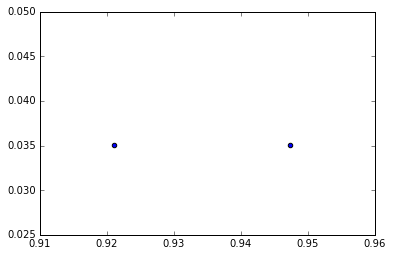

In [14]:
plt.scatter(polyx,polyy)
print Cp,dgp

In [24]:
kernel_svc = svm.SVC(C=Cp, kernel='poly', degree=dgp)
kernel_svc.fit(Xv,Yv)
Y_predict = kernel_svc.predict(Xv)
ac,Fp=FT(Y_predict,Yv)
print ac,Fp    

0.973684210526 0.0263157894737


In [ ]:
# se escogió el kernel polinomial de grado 1 con C= 0.5 con lo que se puede concluir que es un hyperplano